<a href="https://colab.research.google.com/github/elmarsmn/Churn_Exited/blob/main/Churn_exited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,SVR
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv('/content/Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   RowNumber           10000 non-null  int64  
 2   CustomerId          10000 non-null  int64  
 3   Surname             10000 non-null  object 
 4   CreditScore         10000 non-null  int64  
 5   Geography           10000 non-null  object 
 6   Gender              10000 non-null  object 
 7   Age                 10000 non-null  int64  
 8   Tenure              10000 non-null  int64  
 9   Balance             10000 non-null  float64
 10  NumOfProducts       10000 non-null  int64  
 11  HasCrCard           10000 non-null  int64  
 12  IsActiveMember      10000 non-null  int64  
 13  EstimatedSalary     10000 non-null  float64
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.isna().sum()

Unnamed: 0            0
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Complain'}>],
       [<Axes: title={'center': 'Satisfaction Score'}>,
        <Axes: title={'center': 'Point Earned'}>, <Axes: >, <Axes: >]],
      dtype=object)

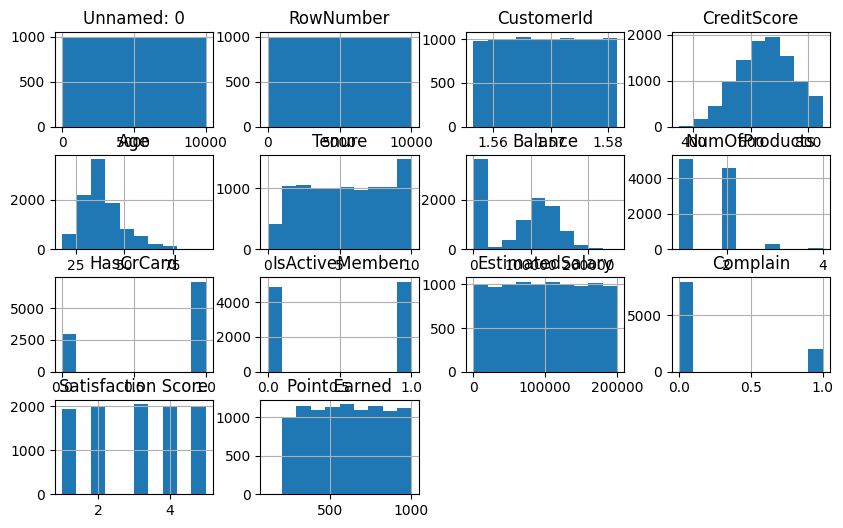

In [ ]:
df.hist(figsize = (10,6))

In [ ]:
df

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,Yes
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,No
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Yes
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,No
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,No
9996,9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,No
9997,9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,Yes
9998,9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,Yes


In [ ]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("Exited",axis = 1)
y = df["Exited"].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [ ]:
df = df.drop('RowNumber',axis = 1)

In [ ]:
df = df.drop('CustomerId',axis = 1)
df = df.drop('Surname',axis = 1)


In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

cat_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "most_frequent")),
    ("one_hot",OneHotEncoder(handle_unknown = "ignore"))
])

transformer = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_features),
    ("cat_pipeline",cat_pipeline,cat_features)
])

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    "SGD" : SGDClassifier()
}

In [ ]:
f1_scorer = make_scorer(f1_score)
results = {}

In [ ]:
for name, clf in classifiers.items():
    full_pipeline = make_pipeline(transformer,clf)
    scores = cross_val_score(full_pipeline, X_test, y_test, cv=5, scoring=f1_scorer)
    results[name] = scores
    print(f"{name} - F1 Scores from Cross-Validation: {scores}")
    print(f"{name} - Mean F1 Score: {scores.mean()}")
    print('\n')


Logistic Regression - F1 Scores from Cross-Validation: [1.         0.99408284 1.         1.         1.        ]
Logistic Regression - Mean F1 Score: 0.9988165680473372


Random Forest - F1 Scores from Cross-Validation: [1.         0.99408284 1.         0.99415205 1.        ]
Random Forest - Mean F1 Score: 0.9976469774040624


Support Vector Machine - F1 Scores from Cross-Validation: [1.         0.99408284 1.         1.         1.        ]
Support Vector Machine - Mean F1 Score: 0.9988165680473372


SGD - F1 Scores from Cross-Validation: [1.         0.99408284 1.         1.         1.        ]
SGD - Mean F1 Score: 0.9988165680473372


